In [1]:
%pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

##  Exploratory Data Analysis

In [3]:
## load the dataset
df=pd.read_csv('Smartphones_cleaned_dataset.csv')
print(df.shape)

(980, 26)


In [4]:
##Show the first 10 rows of the dataset.
df.head(10)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,NaN,1170,2532
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,120,3,1.0,android,200.0,16.0,0,NaN,1080,2400
8,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,...,120,2,1.0,android,50.0,16.0,0,NaN,1080,2400
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,...,90,3,1.0,android,50.0,32.0,0,NaN,1080,2400


In [5]:
##Find all rows where the price is more than 30,000.
high_price = df[df['price'] > 30000]
high_price.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,NaN,1170,2532
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,NaN,True,True,False,snapdragon,8.0,3.20,...,120,4,1.0,android,200.0,12.0,0,NaN,1440,3088
15,apple,Apple iPhone 13,62999,79.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,NaN,1170,2532
17,oppo,OPPO Reno 9 Pro Plus,45999,86.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,32.0,0,NaN,1080,2412


In [6]:
## Show all unique values in the Brand column.
print(df['brand_name'].unique())

['oneplus' 'samsung' 'motorola' 'realme' 'apple' 'xiaomi' 'nothing' 'oppo'
 'vivo' 'poco' 'iqoo' 'jio' 'gionee' 'tecno' 'tesla' 'google' 'infinix'
 'cola' 'letv' 'ikall' 'leeco' 'duoqin' 'nokia' 'lava' 'honor' 'nubia'
 'redmi' 'asus' 'itel' 'royole' 'sony' 'oukitel' 'vertu' 'blu' 'lyf'
 'huawei' 'zte' 'lenovo' 'lg' 'micromax' 'leitz' 'cat' 'doogee' 'tcl'
 'sharp' 'blackview']


In [7]:
## Check for missing values in the dataset.
df.isnull()
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [8]:
## Find the average RAM of all smartphones
avg_ram = df['ram_capacity'].mean()
print(avg_ram)

6.560204081632653


In [10]:
## Count the number of phones per brand.
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

In [11]:
##Show the summary statistics for numeric columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,980.0,32520.504082,39531.812669,3499.00,12999.00,19994.50,35491.50,650000.00
rating,879.0,78.258248,7.402854,60.00,74.00,80.00,84.00,89.00
num_cores,974.0,7.772074,0.836845,4.00,8.00,8.00,8.00,8.00
processor_speed,938.0,2.427217,0.464090,1.20,2.05,2.30,2.84,3.22
battery_capacity,969.0,4817.748194,1009.540054,1821.00,4500.00,5000.00,5000.00,22000.00
fast_charging_available,980.0,0.854082,0.353205,0.00,1.00,1.00,1.00,1.00
fast_charging,769.0,46.126138,34.277870,10.00,18.00,33.00,66.00,240.00
ram_capacity,980.0,6.560204,2.744378,1.00,4.00,6.00,8.00,18.00
internal_memory,980.0,141.036735,107.134516,8.00,64.00,128.00,128.00,1024.00
screen_size,980.0,6.536765,0.349162,3.54,6.50,6.58,6.67,8.03


In [12]:
## Q9. Show the summary statistics for categorical columns
df.describe(include='object').T

,count,unique,top,freq
brand_name,980,46,xiaomi,134
model,980,980,OnePlus 11 5G,1
processor_brand,960,13,snapdragon,413
os,966,3,android,909


In [13]:
## Which line would show you correlation between numeric columns?
df.corr(numeric_only=True).T

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.000000,0.283504,0.305066,0.470951,-0.015807,-0.048561,0.474049,-0.159232,0.116739,0.277591,...,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,0.091945,0.340592,0.353578
rating,0.283504,1.000000,0.596087,0.474754,0.156421,0.199741,0.628446,-0.015581,0.542814,0.527613,...,0.298272,0.610795,0.515531,0.131480,0.562046,0.577861,-0.415265,0.346761,0.432582,0.688108
has_5g,0.305066,0.596087,1.000000,0.481702,0.105542,0.139607,0.609583,-0.013237,0.355858,0.440624,...,0.230598,0.611794,0.206512,0.058059,0.347918,0.358769,-0.507752,0.392268,0.301828,0.504365
has_nfc,0.470951,0.474754,0.481702,1.000000,-0.032541,0.026165,0.609664,-0.106104,0.237947,0.383231,...,0.103099,0.410777,0.166299,0.066278,0.131004,0.285427,-0.564380,0.187599,0.342789,0.430081
has_ir_blaster,-0.015807,0.156421,0.105542,-0.032541,1.000000,0.120363,0.102744,0.059852,0.174060,0.187605,...,0.140809,0.178378,0.198043,-0.011380,0.243608,0.010399,-0.041676,-0.060974,0.155688,0.202746
num_cores,-0.048561,0.199741,0.139607,0.026165,0.120363,1.000000,0.192863,0.241289,0.360476,0.115413,...,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.198742,0.137952,0.266491
processor_speed,0.474049,0.628446,0.609583,0.609664,0.102744,0.192863,1.000000,-0.041930,0.345856,0.615657,...,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,0.259733,0.365757,0.553923
battery_capacity,-0.159232,-0.015581,-0.013237,-0.106104,0.059852,0.241289,-0.041930,1.000000,0.128993,-0.078096,...,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.238755,-0.024607,0.036503
fast_charging_available,0.116739,0.542814,0.355858,0.237947,0.174060,0.360476,0.345856,0.128993,1.000000,NaN,...,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.333016,0.318720,0.510112
fast_charging,0.277591,0.527613,0.440624,0.383231,0.187605,0.115413,0.615657,-0.078096,NaN,1.000000,...,0.258955,0.546374,0.126803,0.012674,0.390718,0.392673,-0.563131,0.026669,0.222381,0.331469


## Visualization & Plotting

<Axes: xlabel='price', ylabel='Count'>

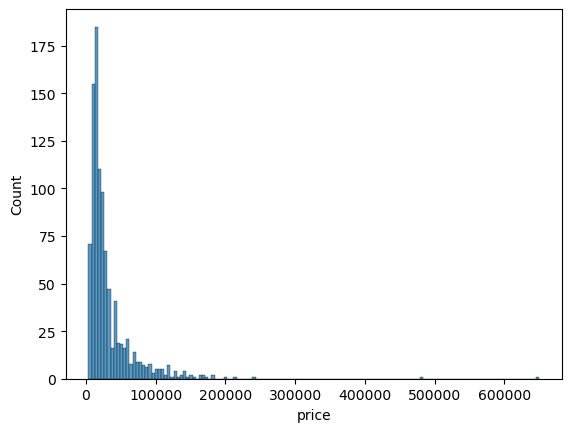

In [ ]:
##  Plot a histogram of Price.##add title,x-label and y-label
sns.histplot(df['price'])

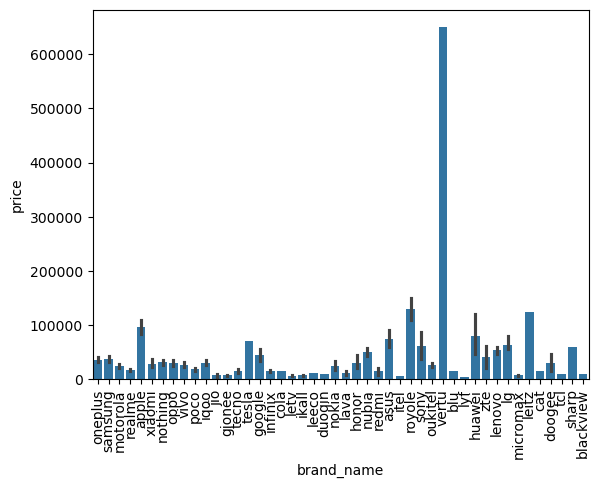

In [ ]:
##  Create a bar plot showing average price per brand
sns.barplot(x='brand_name', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

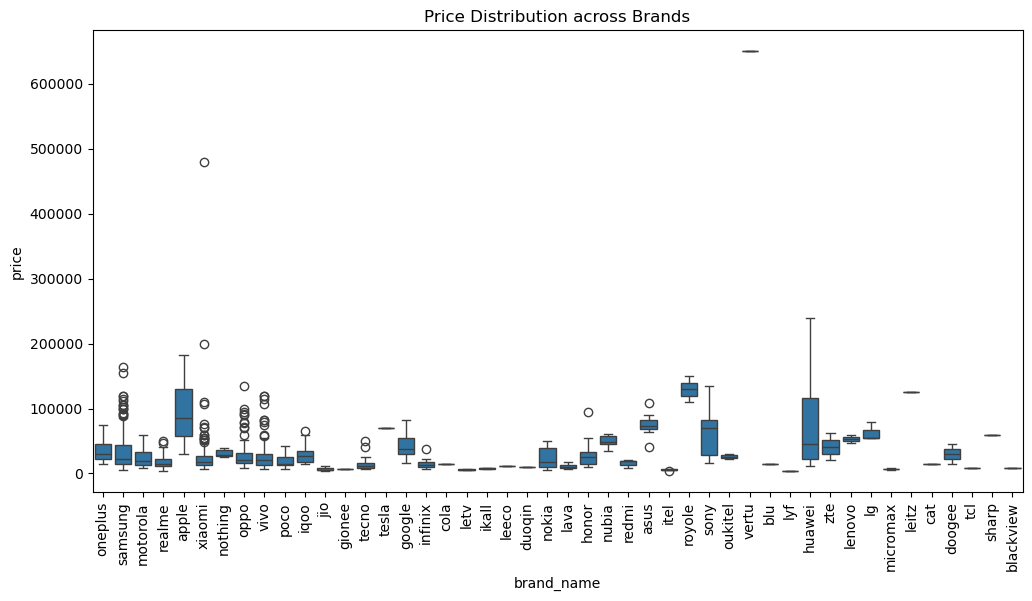

In [ ]:
##Create a boxplot to visualize Price distribution across brands.
plt.figure(figsize=(12,6))
sns.boxplot(x="brand_name", y="price", data=df)
plt.title("Price Distribution across Brands")
plt.ylabel("price")
plt.xlabel("brand_name")
plt.xticks(rotation=90)
plt.savefig('boxplot_price_by_brand.png')
plt.show()

<Axes: >

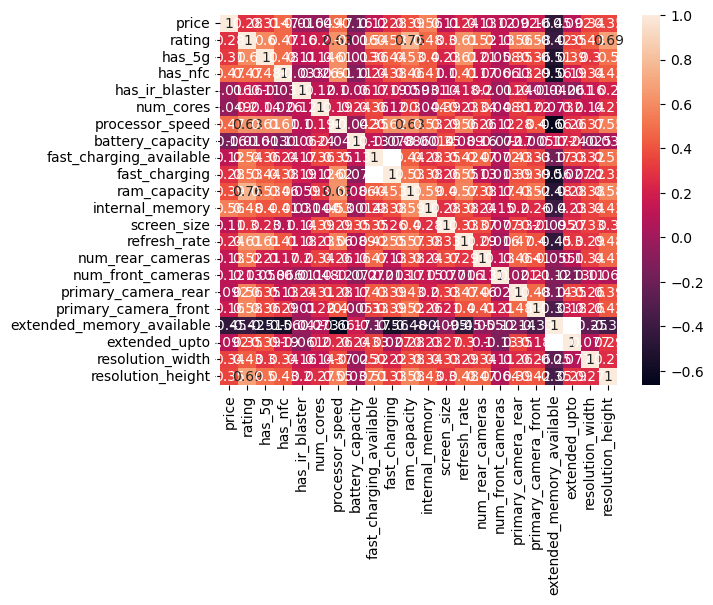

In [ ]:
##  Plot a heatmap of correlations.
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='ram_capacity', ylabel='price'>

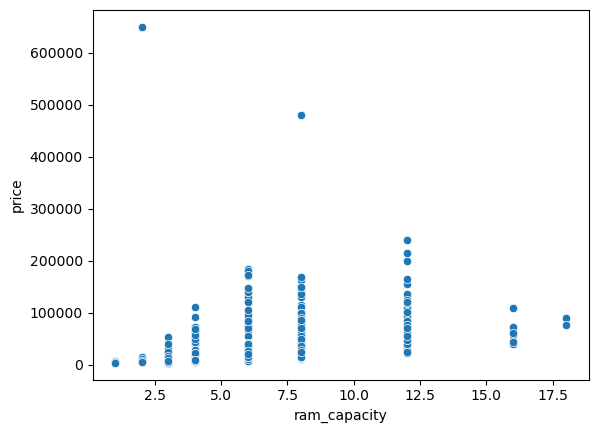

In [ ]:
## Show the relationship between RAM and Price using a scatter plot.
sns.scatterplot(x='ram_capacity', y='price', data=df)


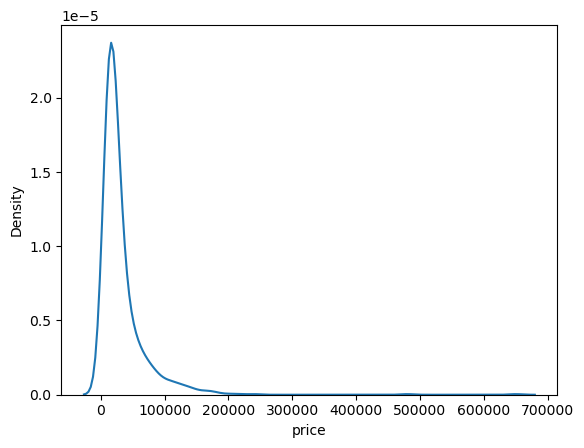

In [17]:
sns.kdeplot(df['price'])
plt.xticks(rotation=0)
plt.savefig('price_plot.png')

## Regression & Price Prediction

In [ ]:
df.head(1)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,Price_per_GB
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,3.2,8.0,3.2,...,3,1.0,android,50.0,16.0,0,736.064,1440,3216,4583.25


In [18]:
# Replacing NaN values with the mean of the column
# Fill missing values in features with their mean
df[['ram_capacity','internal_memory','battery_capacity']] = df[['ram_capacity','internal_memory', 'battery_capacity']].fillna(df[['ram_capacity','internal_memory', 'battery_capacity']].mean())

In [ ]:
##Define features X and target y.
X = df[['ram_capacity', 'internal_memory', 'battery_capacity']]
y = df['battery_capacity']

In [21]:
##split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

     ram_capacity  internal_memory  battery_capacity
481             8              128       4000.000000
974            12              256       4800.000000
667             4              128       5000.000000
589             6              128       5000.000000
33              4               64       3110.000000
..            ...              ...               ...
106            12              256       5000.000000
270            12              128       5003.000000
860             8              256       4500.000000
435             4               64       4817.748194
102             8              128       4400.000000

[784 rows x 3 columns]      ram_capacity  internal_memory  battery_capacity
788             6              512            4325.0
440             4              128            5000.0
139             8              128            4700.0
695             4               64            5000.0
66              8              128            5000.0
..            ...     

In [ ]:
mean_1=df['rating'].mean()
print(mean_1)
df['rating']=df['rating'].fillna(mean_1)
print(df['rating'])

mean_2=df['processor_speed'].mean()
df['processor_speed']=df['processor_speed'].fillna(mean_2)
print(df['processor_speed'])

mean_3=df['processor_brand'].mode()[0]
df['processor_brand']=df['processor_speed'].fillna(mean_3)
print('processor_speed')

mean_4=df['num_cores'].mean()
df['num_cores']=df['num_cores'].fillna(mean_4)
print(df['num_cores'])

mean_5=df['battery_capacity'].mean()
df['battery_capacity']=df['battery_capacity'].fillna(mean_5)

mean_6=df['fast_charging'].mean()
df['fast_charging']=df['fast_charging'].fillna(mean_6)

mean_7=df['num_front_cameras'].mean()
df['num_front_cameras']=df['num_front_cameras'].fillna(mean_7)


mode_8 = df['os'].mode()[0]  
df['os'] = df['os'].fillna(mode_8)

mean_9=df['extended_upto'].mean()
df['extended_upto']=df['extended_upto'].fillna(mean_9)

mean_10=df['primary_camera_front'].mean()
df['primary_camera_front']=df['primary_camera_front'].fillna(mean_10)

78.25824800910124
0      89.0
1      81.0
2      75.0
3      81.0
4      82.0
       ... 
975    83.0
976    75.0
977    85.0
978    80.0
979    74.0
Name: rating, Length: 980, dtype: float64
0      3.200000
1      2.200000
2      2.400000
3      2.200000
4      2.600000
         ...   
975    3.000000
976    2.200000
977    2.850000
978    2.200000
979    2.427217
Name: processor_speed, Length: 980, dtype: float64
processor_speed
0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
975    8.0
976    8.0
977    8.0
978    8.0
979    8.0
Name: num_cores, Length: 980, dtype: float64


In [ ]:
cleaned_missing = df.isnull().sum()
print(cleaned_missing)
cleaned_missing[cleaned_missing > 0] 

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
dtype: int64


Series([], dtype: int64)

In [ ]:
# Replacing NaN values with the mean of the column
# Fill missing values in features with their mean
df[['ram_capacity','internal_memory','battery_capacity']] = df[['ram_capacity','internal_memory', 'battery_capacity']].fillna(df[['ram_capacity','internal_memory', 'battery_capacity']].mean())

In [ ]:
##Train a linear regression model.
model = LinearRegression()
model.fit( X_train,y_train)


LinearRegression()

In [ ]:
##Make predictions on the test set.
y_pred = model.predict(X_test)

In [ ]:
##Calculate Mean Squared Error (MSE).
mse = mean_squared_error(y_test, y_pred)


In [ ]:
## Print R² score.
print(r2_score(y_test,y_pred))

1.0


In [ ]:
df.head(1)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,3.2,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,736.064,1440,3216


In [ ]:
## Add a new feature: Price_per_GB = Price / Storage.
df['Price_per_GB'] = df['price'] / df['ram_capacity']

In [ ]:
##scale features using StandardScaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)


In [24]:
## Try a Decision Tree Regressor.
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)


DecisionTreeRegressor()

##  Feature Importance & Trend Analysis 

In [26]:
# Get feature importances from a trained decision tree.
importances =tree.feature_importances_
print(importances)

[2.24737485e-05 1.82728242e-03 9.98150244e-01]


In [27]:
importances =pd.DataFrame(tree.feature_importances_,columns=['importances'])
print(importances)

   importances
0     0.000022
1     0.001827
2     0.998150


In [ ]:
top_5= X.head()
print(top_5)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
impor=importances.head()
impor.head()

,importances
0,0.000000
1,0.016670
2,0.906143
3,0.077186


In [ ]:
##Select top 3 features using SelectKBest.
selector = SelectKBest(score_func=f_regression, k=3)


In [40]:
##Show the score of each feature
selector.fit(X, y)
print(selector.scores_)


[7.17937555e+00 2.00323658e-03 2.75282527e+17]


In [42]:
##Drop irrelevant columns like Model_Name.
df.drop(columns=['model'], inplace=True)

In [43]:

print(df.columns)

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')


In [45]:
##Sort data by RAM descending.

df.sort_values(by='ram_capacity', ascending=False)

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
406,asus,75990,87.0,True,True,False,snapdragon,8.0,3.20,6000.0,...,165,3,1.0,android,64.0,32.0,0,NaN,1080,2448
278,asus,89999,88.0,True,True,False,snapdragon,8.0,3.20,6000.0,...,165,3,1.0,android,50.0,12.0,0,NaN,1080,2448
318,iqoo,64999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,...,144,3,1.0,android,50.0,16.0,0,NaN,1440,3200
441,asus,72999,88.0,True,True,False,dimensity,8.0,3.20,6000.0,...,165,3,1.0,android,50.0,12.0,0,NaN,1080,2448
459,oppo,42990,86.0,True,True,False,dimensity,8.0,3.05,5000.0,...,120,2,1.0,android,50.0,32.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,itel,3999,NaN,False,False,False,spreadtrum,4.0,1.40,2400.0,...,60,1,1.0,android,5.0,2.0,0,NaN,854,480
827,samsung,4999,NaN,False,False,False,mediatek,4.0,1.50,3000.0,...,60,1,1.0,android,8.0,5.0,1,NaN,720,1480
713,tecno,6999,NaN,False,False,False,spreadtrum,4.0,1.30,4000.0,...,60,2,1.0,android,5.0,5.0,1,NaN,720,1520
472,vivo,7499,NaN,False,False,False,helio,4.0,1.30,1900.0,...,60,1,1.0,android,5.0,2.0,1,128.0,480,854


In [47]:
## Filter phones with RAM > 8GB and Battery > 4000mAh.
df[(df['ram_capacity'] > 8) & (df['battery_capacity'] > 4000)]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
17,oppo,45999,86.0,True,True,False,snapdragon,8.0,3.20,4700.0,...,120,3,1.0,android,50.0,32.0,0,NaN,1080,2412
24,vivo,42990,87.0,True,True,False,dimensity,8.0,3.20,4800.0,...,120,3,1.0,android,64.0,32.0,0,NaN,1080,2400
37,samsung,91999,NaN,True,True,False,snapdragon,8.0,3.00,5000.0,...,120,4,1.0,android,108.0,40.0,0,NaN,1440,3080
67,xiaomi,32999,87.0,True,False,True,dimensity,8.0,2.60,4980.0,...,120,3,1.0,android,200.0,16.0,0,NaN,1080,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,vivo,118990,NaN,True,True,False,snapdragon,8.0,3.00,4600.0,...,120,4,1.0,android,50.0,16.0,0,NaN,1916,2160
951,huawei,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,...,60,4,2.0,android,40.0,32.0,1,256.0,1176,2400
967,xiaomi,54999,89.0,True,True,True,snapdragon,8.0,3.20,5000.0,...,120,3,1.0,android,50.0,32.0,0,NaN,1440,3200
973,google,70990,80.0,True,True,False,google,8.0,NaN,5000.0,...,120,3,1.0,android,50.0,12.0,0,NaN,1440,3120


In [48]:
##Group by Brand and get the average of all numeric features.
df.groupby('brand_name').mean(numeric_only=True)

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
brand_name,,,,,,,,,,,,,,,,,,,,,
apple,95966.521739,76.795455,0.804348,0.978261,0.000000,6.000000,3.074375,3835.831090,0.695652,20.333333,...,6.079565,82.173913,2.304348,1.000000,20.760870,11.452174,0.000000,NaN,1127.282609,2414.434783
asus,74709.428571,87.000000,1.000000,1.000000,0.000000,8.000000,3.157143,5757.142857,1.000000,67.857143,...,6.657143,155.571429,2.857143,1.000000,54.000000,16.571429,0.000000,NaN,1080.000000,2441.142857
blackview,8990.000000,67.000000,1.000000,1.000000,0.000000,8.000000,2.300000,5180.000000,1.000000,10.000000,...,6.100000,60.000000,2.000000,1.000000,13.000000,8.000000,1.000000,NaN,720.000000,1560.000000
blu,14990.000000,85.000000,1.000000,1.000000,0.000000,8.000000,2.400000,5000.000000,1.000000,NaN,...,6.800000,60.000000,4.000000,1.000000,48.000000,16.000000,1.000000,NaN,1080.000000,2460.000000
cat,14999.000000,NaN,0.000000,0.000000,0.000000,4.000000,1.300000,2000.000000,0.000000,NaN,...,4.000000,60.000000,1.000000,1.000000,5.000000,2.000000,0.000000,NaN,480.000000,640.000000
cola,14999.000000,74.000000,0.000000,0.000000,0.000000,8.000000,2.200000,5000.000000,1.000000,33.000000,...,6.400000,90.000000,2.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
doogee,30499.000000,86.000000,0.500000,0.500000,0.000000,8.000000,2.325000,14000.000000,1.000000,33.000000,...,6.440000,90.000000,3.000000,1.000000,108.000000,32.000000,1.000000,1536.000000,1080.000000,2374.000000
duoqin,9990.000000,NaN,0.000000,0.000000,0.000000,8.000000,2.000000,2150.000000,0.000000,NaN,...,3.540000,60.000000,1.000000,1.000000,8.000000,2.000000,1.000000,NaN,640.000000,960.000000
gionee,6896.000000,67.000000,0.000000,0.000000,0.000000,5.333333,1.996667,4100.000000,0.000000,NaN,...,6.420000,60.000000,1.333333,1.000000,14.000000,7.666667,1.000000,256.000000,720.000000,1573.333333


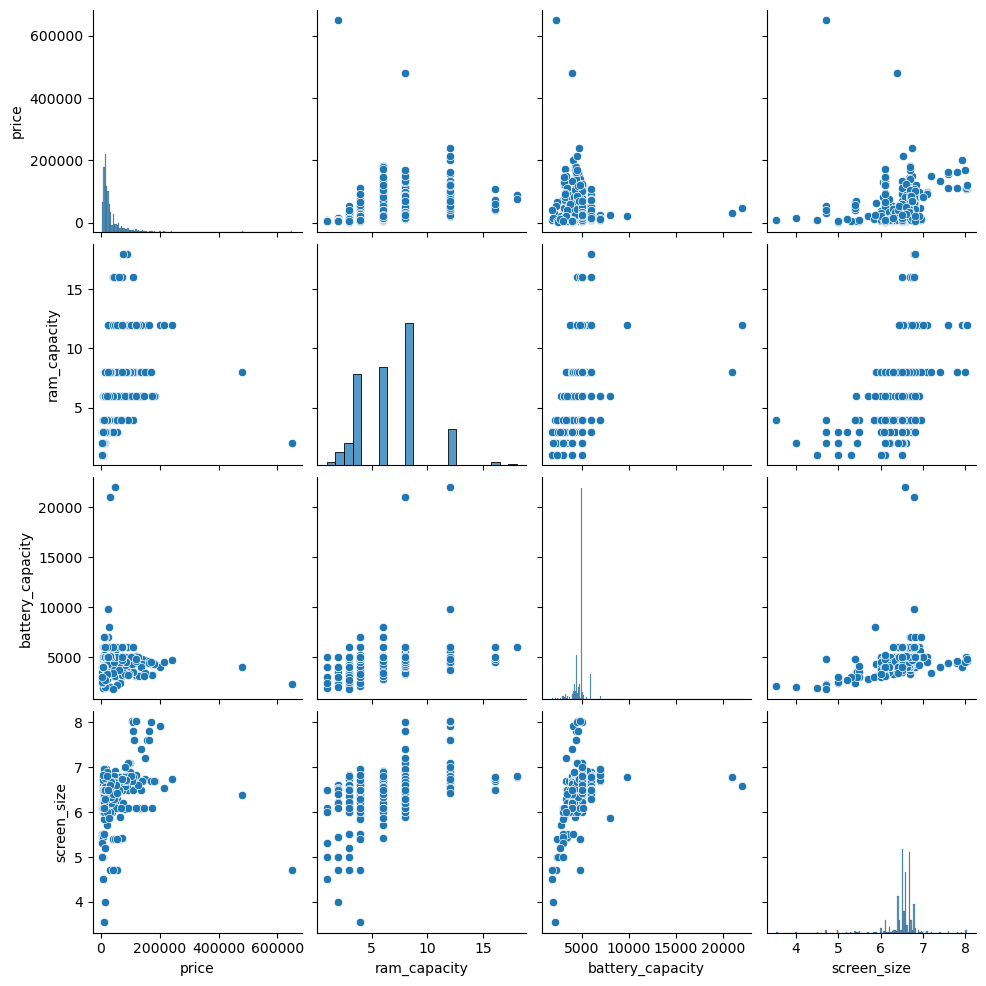

In [ ]:
##Create a pairplot to examine pairwise feature trends.
sns.pairplot(df[['price', 'ram_capacity', 'battery_capacity', 'screen_size']])
plt.show()

##  Train-Test Split & Feature Scaling

In [51]:
## Fill in the code to split the data into 80% training and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


Why do we split data into training and testing sets?
 To evaluate model performance on unseen data

What does random_state=42 do in train_test_split()?
  Ensures reproducibility

What could happen if you evaluate your model on the same data it was trained on?
 It will lead to overfitting and misleading results

Why do we scale features before training a model?
To ensure all features contribute equally

what is the most common scaler used in regression problems?
StandardScaler

 If a feature like RAM ranges from 2 to 16 and Battery ranges from 2000 to 6000, what problem could occur if not scaled?
 The RAM will dominate during training
